In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

file_path_cleaned_hm = 'cleaned_hm.csv'
file_path_demographic = 'demographic.csv'
cleaned_hm_df = pd.read_csv(file_path_cleaned_hm)
demographic_df = pd.read_csv(file_path_demographic)
# combine those two files through the worker id to have more information for each of the happy data
merged_df = pd.merge(cleaned_hm_df, demographic_df, on='wid', how='left')
merged_df_sorted = merged_df.sort_values(by='wid')
file_path_entertainment_dict = 'entertainment-dict.csv'
entertainment_dict_df = pd.read_csv(file_path_entertainment_dict)
entertainment_keywords = entertainment_dict_df['movie'].tolist()
# grab all the lines that marital is married
filtered_df = merged_df_sorted[merged_df_sorted['cleaned_hm'].str.contains('|'.join(entertainment_keywords), case=False, na=False)]
married_df = filtered_df[filtered_df['marital'] == 'married']
married_df_head = married_df.head()
married_df_head


,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood
95156,123355,1,24h,Netflix just released a new season of one of m...,Netflix just released a new season of one of m...,True,1,NaN,leisure,37.0,USA,m,married,y
70803,98864,1,3m,I finished catching up on some of my favorite ...,I finished catching up on some of my favorite ...,True,1,NaN,leisure,37.0,USA,m,married,y
90368,118541,1,24h,I got to play video games online with a buddy ...,I got to play video games online with a buddy ...,True,1,NaN,leisure,37.0,USA,m,married,y
65575,93592,1,3m,A friend of mine finally bought a video game t...,A friend of mine finally bought a video game t...,True,1,NaN,bonding,37.0,USA,m,married,y
27810,55637,1,24h,I got to watch a tv show that i was looking fo...,I got to watch a tv show that i was looking fo...,True,1,NaN,leisure,37.0,USA,m,married,y


In [ ]:
# use the loaded entertainment dictionary to grab the key words for entertainment
def extract_keywords(sentence, keywords):
    extracted_keywords = [keyword for keyword in keywords if keyword in sentence.lower()]
    return ', '.join(extracted_keywords)
married_df['entertainment_keywords'] = married_df['cleaned_hm'].apply(lambda x: extract_keywords(x, entertainment_keywords))
married_df_keywords_head = married_df.head()
married_df_keywords_head


<ipython-input-34-165d368a553c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  married_df['entertainment_keywords'] = married_df['cleaned_hm'].apply(lambda x: extract_keywords(x, entertainment_keywords))


,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood,entertainment_keywords
95156,123355,1,24h,Netflix just released a new season of one of m...,Netflix just released a new season of one of m...,True,1,NaN,leisure,37.0,USA,m,married,y,"show, shows, netflix"
70803,98864,1,3m,I finished catching up on some of my favorite ...,I finished catching up on some of my favorite ...,True,1,NaN,leisure,37.0,USA,m,married,y,"tv, show, shows"
90368,118541,1,24h,I got to play video games online with a buddy ...,I got to play video games online with a buddy ...,True,1,NaN,leisure,37.0,USA,m,married,y,"video, vid, video game"
65575,93592,1,3m,A friend of mine finally bought a video game t...,A friend of mine finally bought a video game t...,True,1,NaN,bonding,37.0,USA,m,married,y,"video, vid, video game"
27810,55637,1,24h,I got to watch a tv show that i was looking fo...,I got to watch a tv show that i was looking fo...,True,1,NaN,leisure,37.0,USA,m,married,y,"tv, show, netflix"


In [ ]:
gender_m_df = married_df[married_df['gender'] == 'm']
gender_m_df_head = gender_m_df.head()
gender_m_df_head


,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood,entertainment_keywords
95156,123355,1,24h,Netflix just released a new season of one of m...,Netflix just released a new season of one of m...,True,1,NaN,leisure,37.0,USA,m,married,y,"show, shows, netflix"
70803,98864,1,3m,I finished catching up on some of my favorite ...,I finished catching up on some of my favorite ...,True,1,NaN,leisure,37.0,USA,m,married,y,"tv, show, shows"
90368,118541,1,24h,I got to play video games online with a buddy ...,I got to play video games online with a buddy ...,True,1,NaN,leisure,37.0,USA,m,married,y,"video, vid, video game"
65575,93592,1,3m,A friend of mine finally bought a video game t...,A friend of mine finally bought a video game t...,True,1,NaN,bonding,37.0,USA,m,married,y,"video, vid, video game"
27810,55637,1,24h,I got to watch a tv show that i was looking fo...,I got to watch a tv show that i was looking fo...,True,1,NaN,leisure,37.0,USA,m,married,y,"tv, show, netflix"


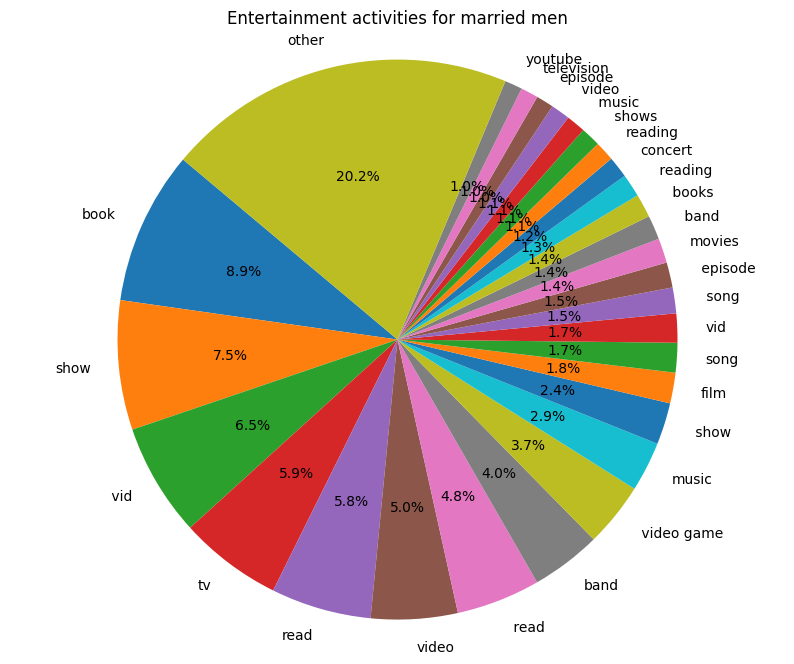

In [ ]:
# show married men's entertainment
male_entertainment_df = married_df[married_df['gender'] == 'm']
male_entertainment_df_head = male_entertainment_df.head()
male_entertainment_df_head

all_keywords = ','.join(male_entertainment_df['entertainment_keywords']).split(',')

keyword_frequency = pd.Series(all_keywords).replace('', pd.NA).dropna().value_counts(normalize=True)

other_threshold = 0.01
other_keywords_frequency = keyword_frequency[keyword_frequency < other_threshold].sum()
keyword_frequency = keyword_frequency[keyword_frequency >= other_threshold]
keyword_frequency['other'] = other_keywords_frequency

plt.figure(figsize=(10, 8))
plt.pie(keyword_frequency, labels=keyword_frequency.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Entertainment activities for married men')
plt.show()

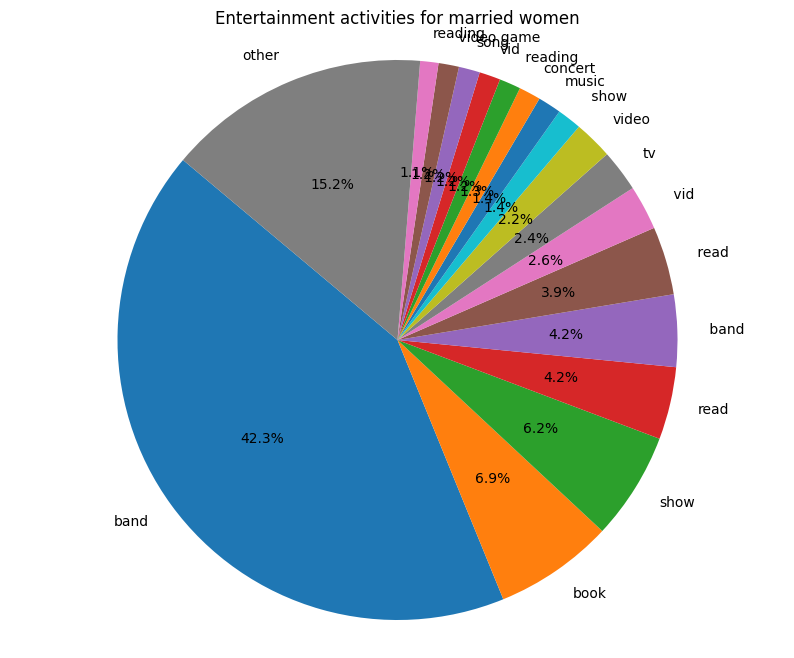

In [ ]:
# show married women's entertainment
female_entertainment_df = married_df[married_df['gender'] == 'f']
female_entertainment_df_head = female_entertainment_df.head()
female_entertainment_df_head

all_keywords = ','.join(female_entertainment_df['entertainment_keywords']).split(',')

keyword_frequency = pd.Series(all_keywords).replace('', pd.NA).dropna().value_counts(normalize=True)

other_threshold = 0.01
other_keywords_frequency = keyword_frequency[keyword_frequency < other_threshold].sum()
keyword_frequency = keyword_frequency[keyword_frequency >= other_threshold]
keyword_frequency['other'] = other_keywords_frequency

plt.figure(figsize=(10, 8))
plt.pie(keyword_frequency, labels=keyword_frequency.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Entertainment activities for married women')
plt.show()



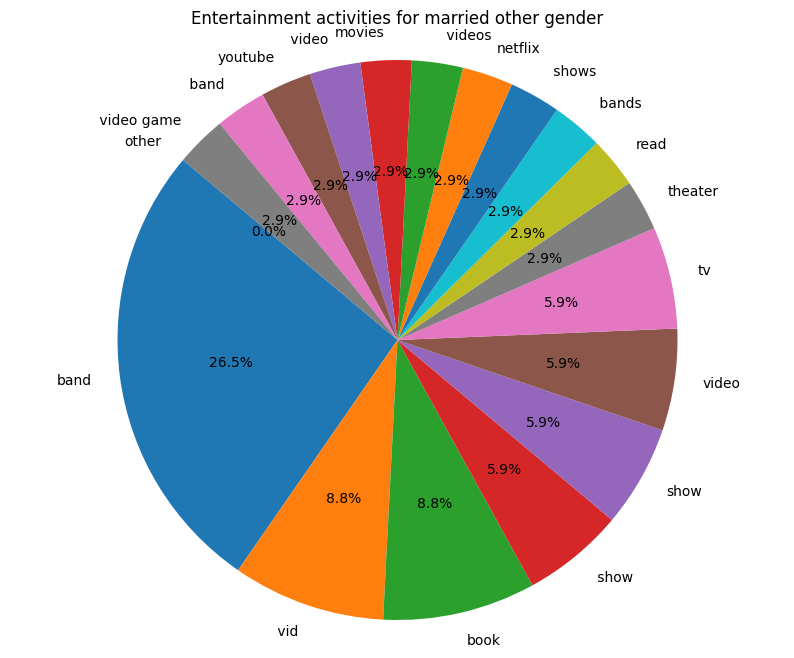

In [ ]:
# show married other gender's entertainment
other_entertainment_df = married_df[married_df['gender'] == 'o']
other_entertainment_df_head = other_entertainment_df.head()
other_entertainment_df_head

all_keywords = ','.join(other_entertainment_df['entertainment_keywords']).split(',')

keyword_frequency = pd.Series(all_keywords).replace('', pd.NA).dropna().value_counts(normalize=True)

other_threshold = 0.01
other_keywords_frequency = keyword_frequency[keyword_frequency < other_threshold].sum()
keyword_frequency = keyword_frequency[keyword_frequency >= other_threshold]
keyword_frequency['other'] = other_keywords_frequency

plt.figure(figsize=(10, 8))
plt.pie(keyword_frequency, labels=keyword_frequency.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Entertainment activities for married other gender')
plt.show()

In [ ]:
# grab all the lines whose marital is single
single_df = filtered_df[filtered_df['marital'] == 'single']
single_df_head = single_df.head()
single_df_head

def extract_keywords(sentence, keywords):
    extracted_keywords = [keyword for keyword in keywords if keyword in sentence.lower()]
    return ', '.join(extracted_keywords)

single_df['entertainment_keywords'] = single_df['cleaned_hm'].apply(lambda x: extract_keywords(x, entertainment_keywords))
single_df_keywords_head = single_df.head()
single_df_keywords_head

<ipython-input-39-f1745f9d86e4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_df['entertainment_keywords'] = single_df['cleaned_hm'].apply(lambda x: extract_keywords(x, entertainment_keywords))


,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood,entertainment_keywords
56895,84861,3,3m,ALL MY FRIENDS AND RELATIVE ARE CAME TO MY HOM...,ALL MY FRIENDS AND RELATIVE ARE CAME TO MY HOM...,False,1,NaN,bonding,25,IND,m,single,n,
49388,77321,3,3m,There are numerous happy events in my life tha...,There are numerous happy events in my life tha...,True,6,NaN,affection,25,IND,m,single,n,vid
45409,73329,3,3m,. I attended the game with 4 of my friends plu...,. I attended the game with 4 of my friends plu...,True,6,NaN,bonding,25,IND,m,single,n,show
26156,53970,3,24h,my friends and relatives are come to my home f...,my friends and relatives are come to my home f...,True,1,NaN,bonding,25,IND,m,single,n,
83180,111304,3,24h,all my friends and relatives are came to my ho...,all my friends and relatives are came to my ho...,True,1,NaN,bonding,25,IND,m,single,n,


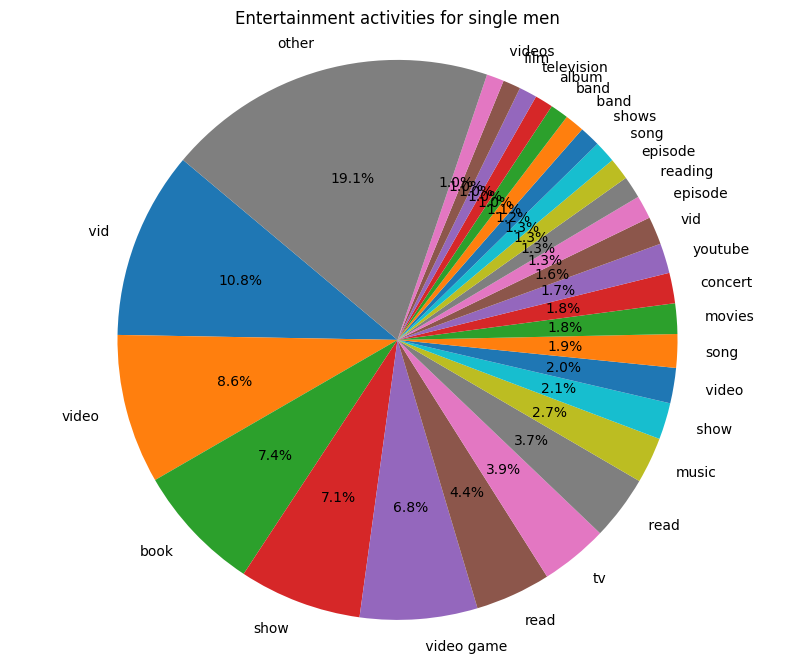

In [ ]:
# show single male's entertainment
smale_entertainment_df = single_df[single_df['gender'] == 'm']
smale_entertainment_df_head = smale_entertainment_df.head()
smale_entertainment_df_head

all_keywords = ','.join(smale_entertainment_df['entertainment_keywords']).split(',')

keyword_frequency = pd.Series(all_keywords).replace('', pd.NA).dropna().value_counts(normalize=True)

other_threshold = 0.01
other_keywords_frequency = keyword_frequency[keyword_frequency < other_threshold].sum()
keyword_frequency = keyword_frequency[keyword_frequency >= other_threshold]
keyword_frequency['other'] = other_keywords_frequency

plt.figure(figsize=(10, 8))
plt.pie(keyword_frequency, labels=keyword_frequency.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Entertainment activities for single men')
plt.show()

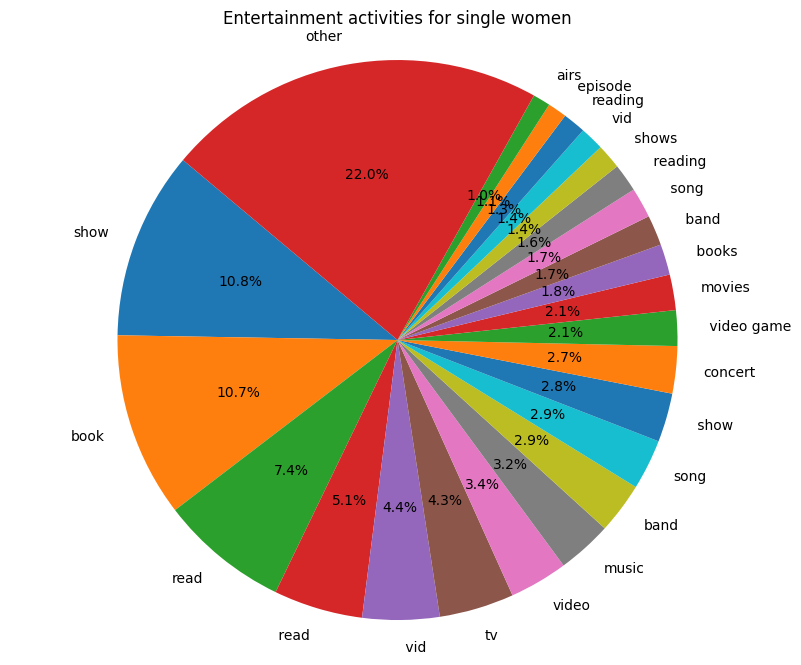

In [ ]:
# show single female's entertainment
sfemale_entertainment_df = single_df[single_df['gender'] == 'f']
sfemale_entertainment_df_head = sfemale_entertainment_df.head()
sfemale_entertainment_df_head

all_keywords = ','.join(sfemale_entertainment_df['entertainment_keywords']).split(',')

keyword_frequency = pd.Series(all_keywords).replace('', pd.NA).dropna().value_counts(normalize=True)

other_threshold = 0.01
other_keywords_frequency = keyword_frequency[keyword_frequency < other_threshold].sum()
keyword_frequency = keyword_frequency[keyword_frequency >= other_threshold]
keyword_frequency['other'] = other_keywords_frequency

plt.figure(figsize=(10, 8))
plt.pie(keyword_frequency, labels=keyword_frequency.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Entertainment activities for single women')
plt.show()

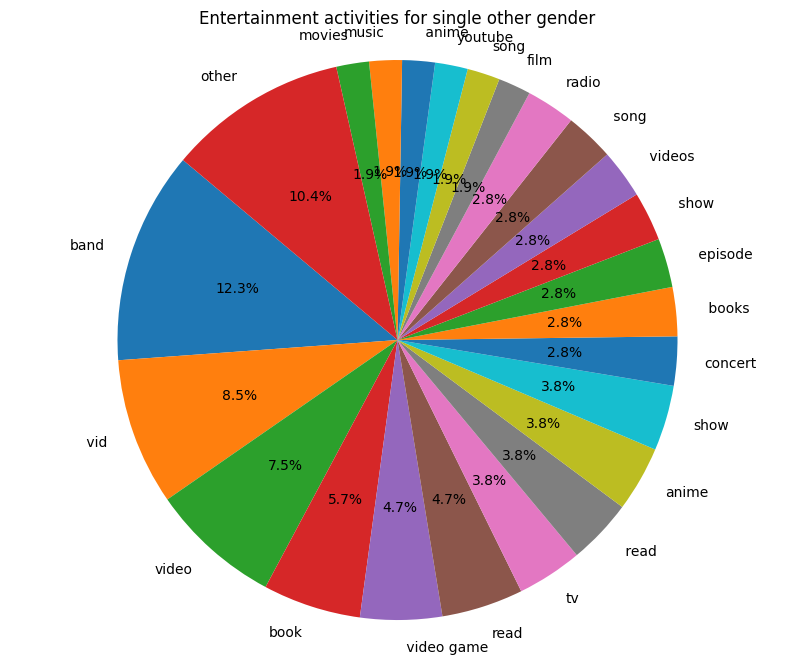

In [ ]:
# show single other gender's entertainment
sother_entertainment_df = single_df[single_df['gender'] == 'o']
sother_entertainment_df_head = sother_entertainment_df.head()
sother_entertainment_df_head

all_keywords = ','.join(sother_entertainment_df['entertainment_keywords']).split(',')

keyword_frequency = pd.Series(all_keywords).replace('', pd.NA).dropna().value_counts(normalize=True)

other_threshold = 0.01
other_keywords_frequency = keyword_frequency[keyword_frequency < other_threshold].sum()
keyword_frequency = keyword_frequency[keyword_frequency >= other_threshold]
keyword_frequency['other'] = other_keywords_frequency

plt.figure(figsize=(10, 8))
plt.pie(keyword_frequency, labels=keyword_frequency.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Entertainment activities for single other gender')
plt.show()